## Imoport Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

## Load Dataset

In [3]:
df = pd.read_csv("customers.csv")
df

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


In [5]:
df.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [29]:
df.dtypes

CustomerID                 int64
Gender                    object
Age                        int64
Annual Income (k$)         int64
Spending Score (1-100)     int64
dtype: object

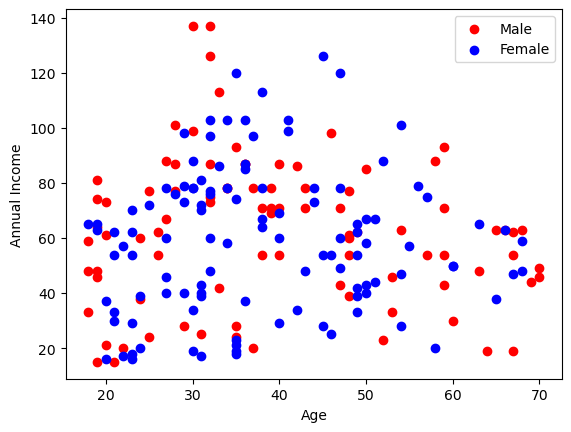

In [19]:
male = df[df.Gender == "Male"]
female = df[df.Gender == "Female"]
plt.scatter(male.Age, male["Annual Income (k$)"], label = "Male", c= "red")
plt.scatter(female.Age, female["Annual Income (k$)"], label = "Female", c= "blue")
plt.ylabel("Annual Income")
plt.xlabel("Age")
plt.legend()

/Users/sasan/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Age'>

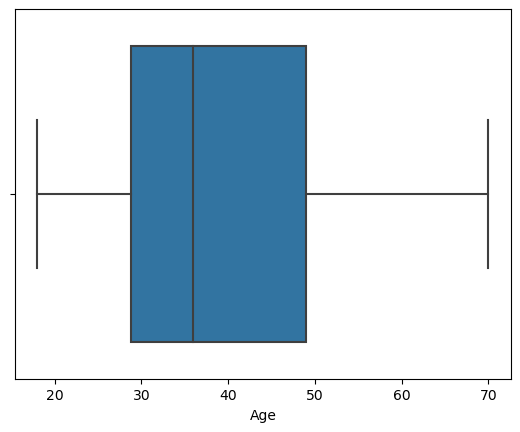

In [7]:
sb.boxplot(df.Age)

/Users/sasan/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Annual Income (k$)'>

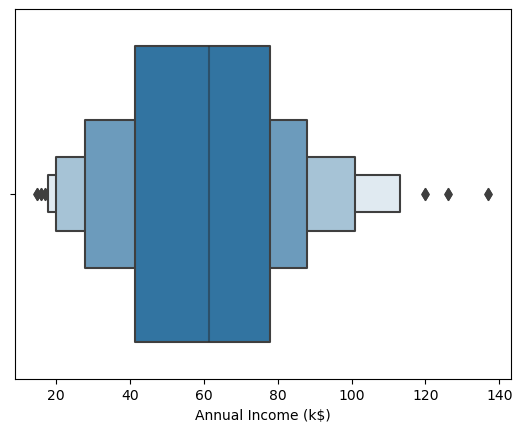

In [8]:
sb.boxenplot(df["Annual Income (k$)"])

## Label Encoding

In [37]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder().fit(df.Gender)
df.Gender = encoder.transform(df.Gender)
df

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,1,19,15,39
1,2,1,21,15,81
2,3,0,20,16,6
3,4,0,23,16,77
4,5,0,31,17,40
...,...,...,...,...,...
195,196,0,35,120,79
196,197,0,45,126,28
197,198,1,32,126,74
198,199,1,32,137,18


## Standard Scaling

In [38]:
from sklearn.preprocessing import StandardScaler
X = df.iloc[:, 1:].values
scaler = StandardScaler().fit(X)
X = scaler.transform(X)

## Clustering using KMeans

In [41]:
from sklearn.cluster import KMeans
k_means = KMeans(n_clusters= 4)
k_means.fit(X)
k_means.labels_

array([2, 2, 3, 1, 1, 1, 3, 1, 0, 1, 0, 1, 3, 1, 0, 2, 3, 2, 0, 1, 0, 2,
       3, 2, 3, 2, 3, 2, 3, 1, 0, 1, 0, 2, 3, 1, 3, 1, 3, 1, 3, 2, 0, 1,
       3, 1, 3, 1, 1, 1, 3, 2, 1, 0, 3, 0, 3, 0, 1, 0, 0, 2, 3, 3, 0, 2,
       3, 3, 2, 1, 0, 3, 3, 3, 0, 2, 3, 0, 1, 3, 0, 2, 0, 3, 1, 0, 3, 1,
       1, 3, 3, 2, 0, 3, 1, 2, 3, 1, 0, 2, 1, 3, 0, 2, 0, 1, 3, 0, 0, 0,
       0, 1, 3, 2, 1, 1, 3, 3, 3, 3, 2, 3, 1, 2, 1, 1, 0, 2, 0, 2, 0, 2,
       1, 1, 0, 1, 3, 2, 0, 1, 3, 2, 1, 1, 0, 2, 0, 1, 3, 2, 0, 2, 3, 1,
       3, 1, 0, 1, 0, 1, 3, 1, 0, 1, 0, 1, 0, 1, 3, 2, 0, 2, 0, 2, 3, 1,
       0, 2, 0, 2, 3, 1, 0, 1, 3, 2, 3, 2, 3, 1, 3, 1, 0, 1, 3, 1, 3, 2,
       0, 2], dtype=int32)

In [43]:
df["kmean_cluster"] = k_means.labels_
df

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),kmean_cluster
0,1,1,19,15,39,2
1,2,1,21,15,81,2
2,3,0,20,16,6,3
3,4,0,23,16,77,1
4,5,0,31,17,40,1
...,...,...,...,...,...,...
195,196,0,35,120,79,1
196,197,0,45,126,28,3
197,198,1,32,126,74,2
198,199,1,32,137,18,0


In [44]:
df.groupby("kmean_cluster").mean()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
kmean_cluster,,,,,
0,104.958333,1.0,49.437500,62.416667,29.208333
1,100.210526,0.0,28.438596,59.666667,67.684211
2,103.375000,1.0,28.250000,62.000000,71.675000
3,94.818182,0.0,48.109091,58.818182,34.781818


In [49]:
k_means.cluster_centers_

array([[ 1.12815215,  0.75982983,  0.07086791, -0.81492926],
       [-0.88640526, -0.74719196, -0.03409802,  0.67876434],
       [ 1.12815215, -0.76072691,  0.05496398,  0.83369302],
       [-0.88640526,  0.6644943 , -0.06648421, -0.59855788]])

/var/folders/6d/7p8150cn1qq03p3t9h0xpkrm0000gn/T/ipykernel_32953/1460724970.py:1: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  plt.scatter(df.Age, df["Annual Income (k$)"], c= k_means.labels_.astype(np.float))


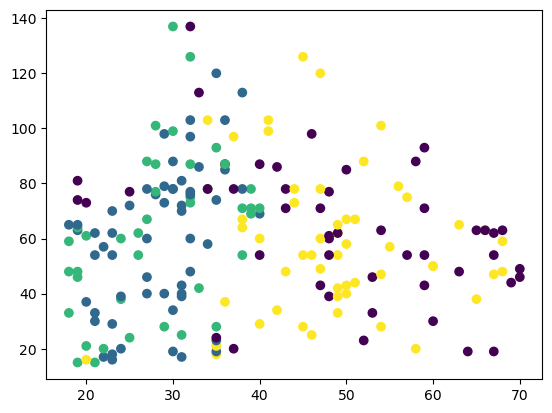

In [68]:
plt.scatter(df.Age, df["Annual Income (k$)"], c= k_means.labels_.astype(np.float))
plt.show()

/var/folders/6d/7p8150cn1qq03p3t9h0xpkrm0000gn/T/ipykernel_32953/2890214371.py:4: MatplotlibDeprecationWarning: Axes3D(fig) adding itself to the figure is deprecated since 3.4. Pass the keyword argument auto_add_to_figure=False and use fig.add_axes(ax) to suppress this warning. The default value of auto_add_to_figure will change to False in mpl3.5 and True values will no longer work in 3.6.  This is consistent with other Axes classes.
  ax = Axes3D(fig, rect=[0, 0, .95, 1], elev=48, azim=134)
/var/folders/6d/7p8150cn1qq03p3t9h0xpkrm0000gn/T/ipykernel_32953/2890214371.py:11: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  ax.scatter(df.Age, df["Annual Income (k$)"]

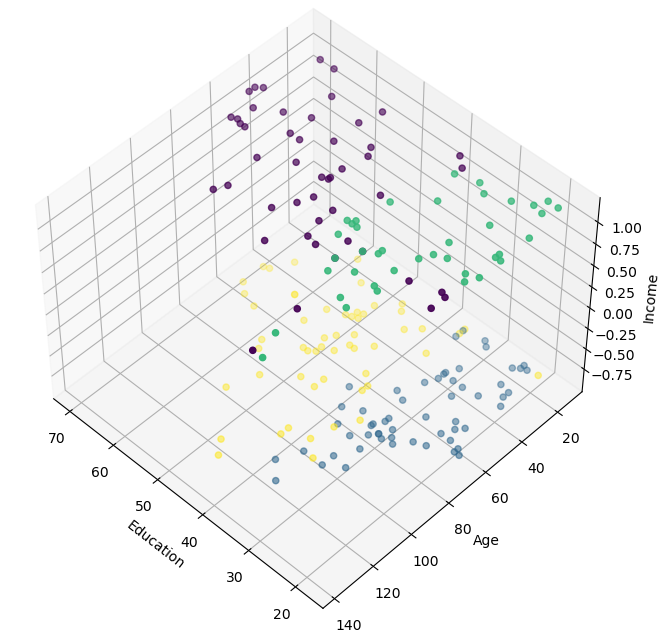

In [52]:
from mpl_toolkits.mplot3d import Axes3D 
fig = plt.figure(1, figsize=(8, 6))
plt.clf()
ax = Axes3D(fig, rect=[0, 0, .95, 1], elev=48, azim=134)

plt.cla()
ax.set_xlabel('Education')
ax.set_ylabel('Age')
ax.set_zlabel('Income')

ax.scatter(df.Age, df["Annual Income (k$)"], X[:, 0], c= k_means.labels_.astype(np.float))

## Clustering Using Hierarchial

In [53]:
from sklearn.metrics.pairwise import euclidean_distances
distance_matrix = euclidean_distances(X, X)
distance_matrix

array([[0.        , 1.63681098, 2.38878538, ..., 4.54611614, 4.81867651,
        5.02250496],
       [1.63681098, 0.        , 3.54154808, ..., 4.3182849 , 5.31878915,
        4.70189264],
       [2.38878538, 3.54154808, 0.        , ..., 5.42195122, 5.13299938,
        5.90251765],
       ...,
       [4.54611614, 4.3182849 , 5.42195122, ..., 0.        , 2.21418015,
        0.5647686 ],
       [4.81867651, 5.31878915, 5.13299938, ..., 2.21418015, 0.        ,
        2.5274803 ],
       [5.02250496, 4.70189264, 5.90251765, ..., 0.5647686 , 2.5274803 ,
        0.        ]])

In [55]:
from scipy.cluster import hierarchy
Z = hierarchy.linkage(distance_matrix, "complete")

/var/folders/6d/7p8150cn1qq03p3t9h0xpkrm0000gn/T/ipykernel_32953/1372134438.py:2: ClusterWarning: scipy.cluster: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  Z = hierarchy.linkage(distance_matrix, "complete")


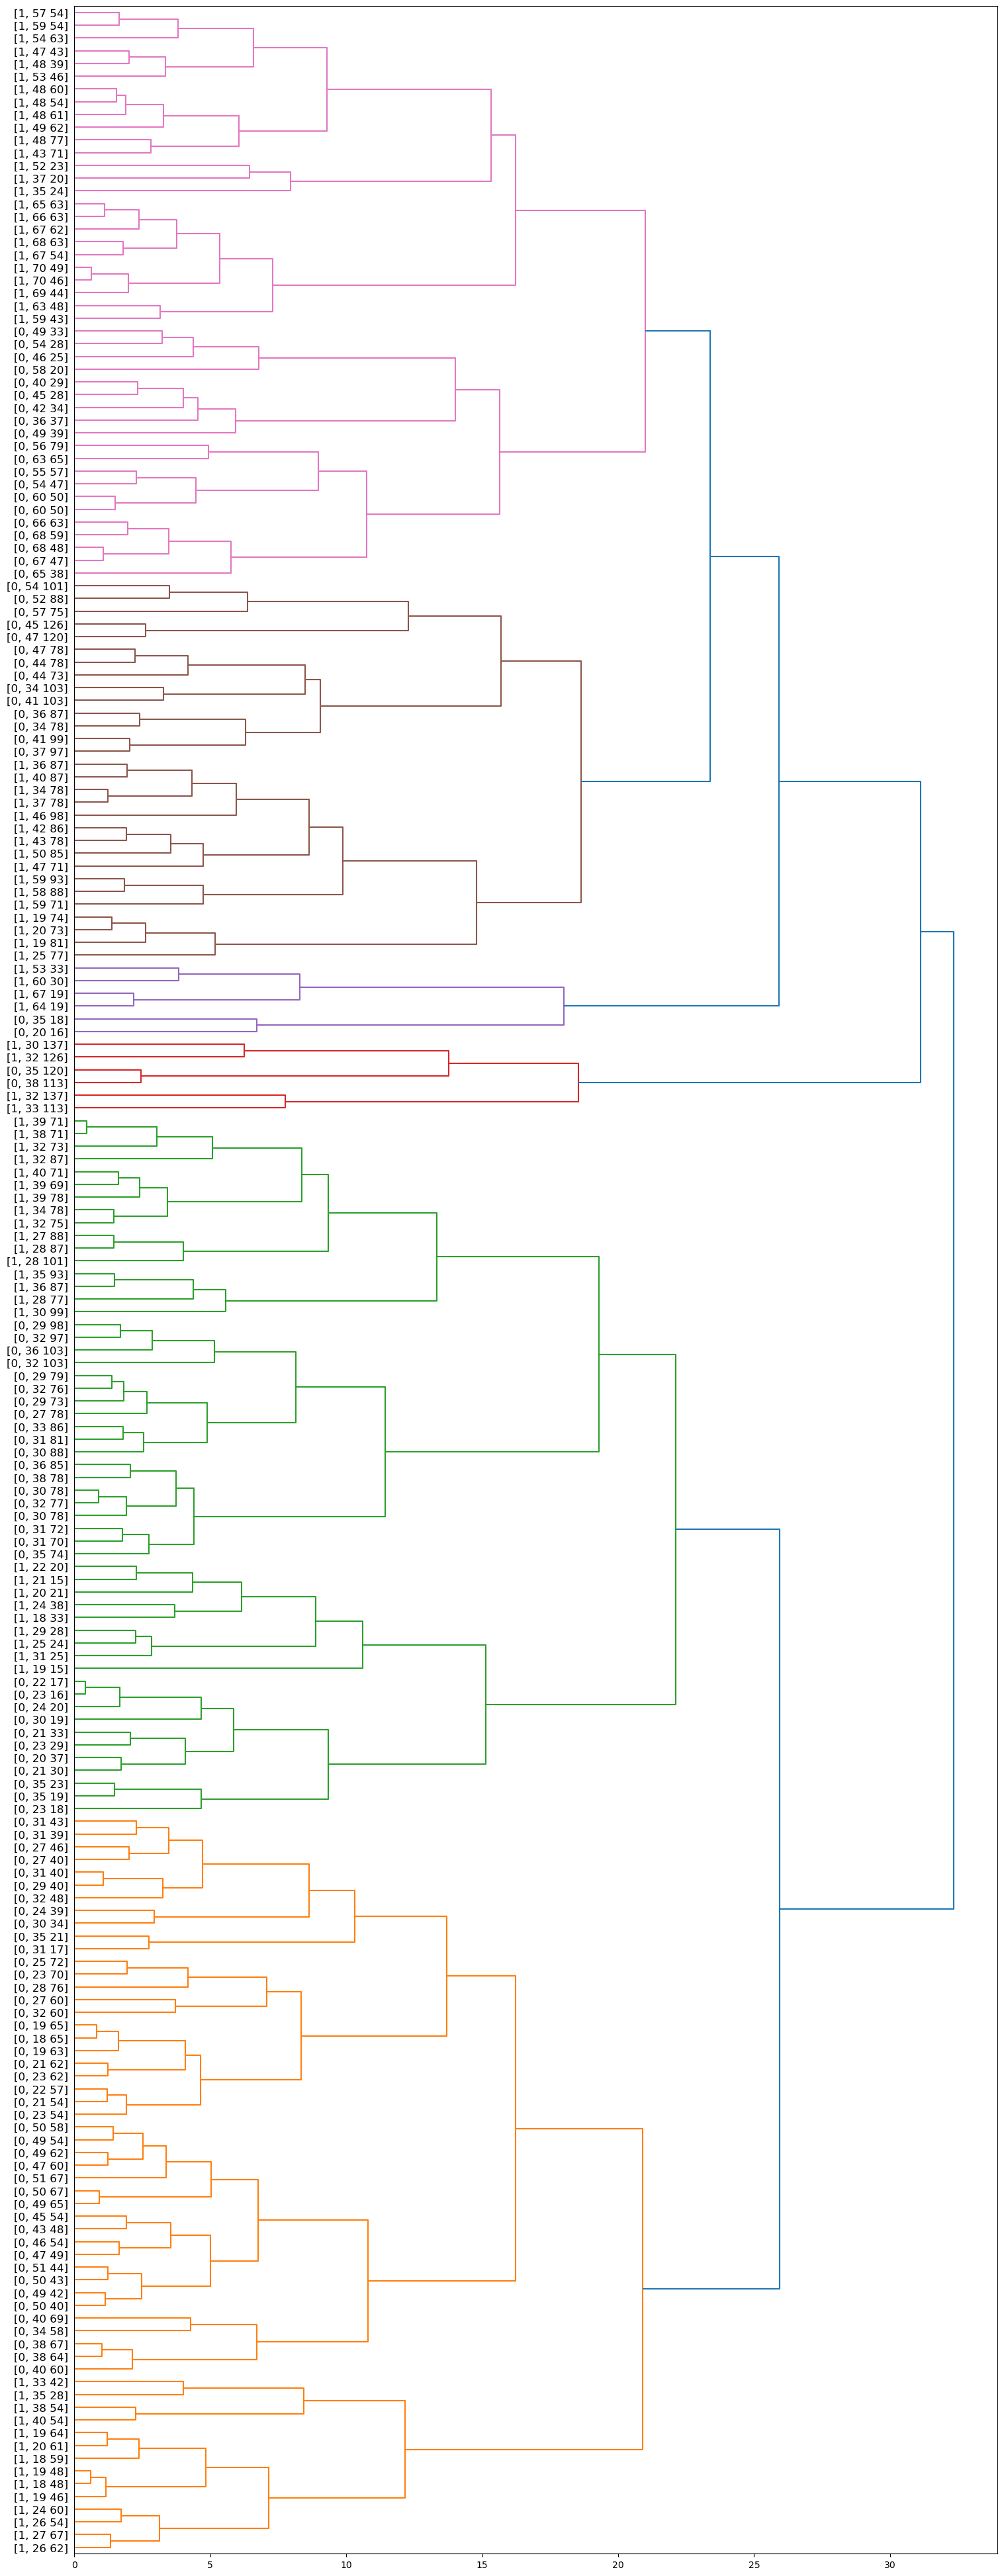

In [60]:
plt.figure(figsize= (18, 50))
def llf(index):
    return "[%s, %s %s]" % (df.Gender[index], df.Age[index], df["Annual Income (k$)"][index])
dendro = hierarchy.dendrogram(Z, orientation= "right", leaf_font_size= 12, leaf_label_func= llf)

In [63]:
from sklearn.cluster import AgglomerativeClustering
agglom = AgglomerativeClustering(n_clusters= 4, linkage= "complete")
agglom.fit(X)
agglom.labels_

array([0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 2, 0, 2, 0, 0, 0, 0, 0, 2, 0, 0, 0,
       2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0,
       2, 0, 2, 0, 0, 0, 2, 0, 0, 2, 2, 2, 2, 2, 0, 2, 2, 0, 2, 2, 2, 0,
       2, 2, 0, 0, 2, 2, 2, 2, 2, 0, 2, 0, 0, 2, 2, 0, 2, 2, 0, 2, 2, 0,
       0, 2, 2, 0, 2, 0, 0, 0, 2, 0, 2, 0, 0, 2, 2, 0, 2, 0, 2, 2, 2, 2,
       2, 0, 0, 0, 0, 0, 2, 2, 2, 2, 0, 0, 0, 3, 0, 3, 2, 3, 1, 3, 1, 3,
       0, 3, 1, 3, 1, 3, 1, 3, 2, 3, 0, 3, 1, 3, 2, 3, 1, 3, 1, 3, 1, 3,
       1, 3, 1, 3, 1, 3, 2, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 2, 3,
       1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 2, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3,
       1, 3])

In [65]:
df["hierarchy_cluster"] = agglom.labels_
df

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),kmean_cluster,hierarchy_cluster
0,1,1,19,15,39,2,0
1,2,1,21,15,81,2,0
2,3,0,20,16,6,3,0
3,4,0,23,16,77,1,0
4,5,0,31,17,40,1,0
...,...,...,...,...,...,...,...
195,196,0,35,120,79,1,3
196,197,0,45,126,28,3,1
197,198,1,32,126,74,2,3
198,199,1,32,137,18,0,1


In [67]:
df.groupby("hierarchy_cluster").mean()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),kmean_cluster
hierarchy_cluster,,,,,,
0,59.686567,0.373134,26.776119,42.537313,56.522388,1.462687
1,166.103448,0.620690,39.620690,89.551724,15.758621,1.137931
2,76.400000,0.415385,54.646154,50.615385,39.892308,1.753846
3,162.000000,0.461538,32.692308,86.538462,82.128205,1.461538


/var/folders/6d/7p8150cn1qq03p3t9h0xpkrm0000gn/T/ipykernel_32953/3543221793.py:1: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  plt.scatter(df.Age, df["Annual Income (k$)"], c= agglom.labels_.astype(np.float))


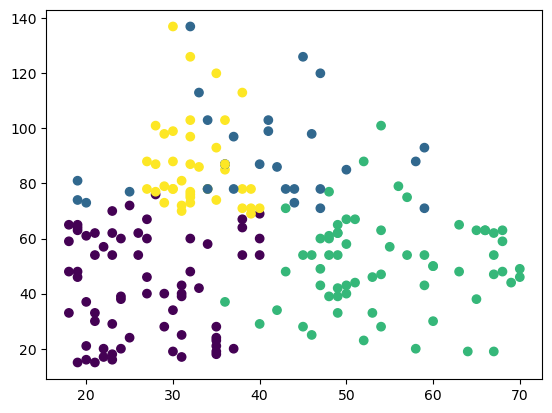

In [69]:
plt.scatter(df.Age, df["Annual Income (k$)"], c= agglom.labels_.astype(np.float))
plt.show()

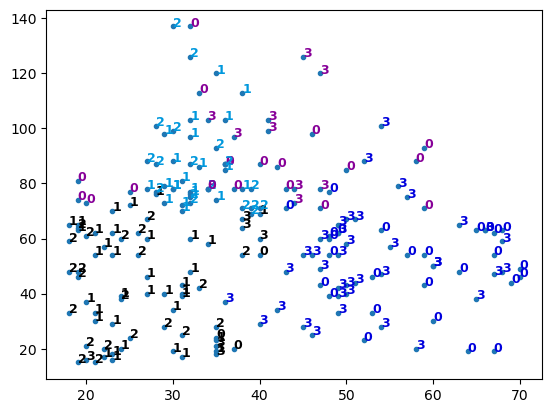

In [75]:
for index in df.index:
    plt.text(df.Age[index], df["Annual Income (k$)"][index], str(df["kmean_cluster"][index]), 
             color= plt.cm.nipy_spectral(agglom.labels_[index] / 10.), fontdict={'weight': 'bold', 'size': 9})
plt.scatter(df.Age, df["Annual Income (k$)"], marker= ".")
plt.show()

## Clustering using DBSCAN

In [89]:
from sklearn.cluster import DBSCAN
db = DBSCAN(eps= 0.9, min_samples= 6)
db.fit(X)
db.labels_

array([-1,  0, -1,  1,  1,  1,  1,  1, -1,  1, -1,  1,  1,  1, -1,  0,  1,
        0,  0,  1, -1,  0,  1,  0,  1,  0,  1,  0,  1,  1, -1,  1, -1,  0,
        1,  1,  1,  1,  1,  1,  1,  0,  0,  1,  1,  1,  1,  1,  1,  1,  1,
        0,  1,  0,  1,  0,  1,  0,  1,  0,  0,  0,  1,  1,  0,  0,  1,  1,
        0,  1,  0,  1,  1,  1,  0,  0,  1,  0,  1,  1,  0,  0,  0,  1,  1,
        0,  1,  1,  1,  1,  1,  0,  0,  1,  1,  0,  1,  1,  0,  0,  1,  1,
        0,  0,  0,  1,  1,  0,  0,  0,  0,  1,  1,  0,  1,  1,  1,  1,  1,
        1,  0,  1,  1,  0,  1,  1,  0,  0,  0,  0,  0,  0,  1,  1,  0,  1,
        1,  0,  0,  1,  1,  0,  1,  1,  0,  0,  0,  1,  1,  0,  0,  0,  1,
        1,  1,  1,  0,  1,  0,  1,  1,  1,  0,  1,  0,  1,  0,  1,  1,  0,
        0,  0,  0,  0,  1,  1,  0,  0,  0,  0,  1,  1,  0,  1,  1,  0,  1,
        0,  1,  1,  1,  1, -1,  1,  1,  1, -1, -1, -1, -1])

In [91]:
labels = db.labels_
set(db.labels_)
print(db.core_sample_indices_)

[  1   3   5   7   9  13  15  16  21  23  24  25  26  28  29  31  34  35
  36  37  38  39  42  43  44  45  46  47  48  49  50  51  52  53  54  55
  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71  72  73
  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89  90  91
  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107 108 109
 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125 126 127
 129 130 131 132 133 135 137 139 141 142 143 144 145 146 147 148 149 150
 151 152 153 155 156 157 158 159 161 163 164 165 166 167 168 169 170 171
 172 173 174 175 179 180 181 182 183 188 189 191]


In [92]:
core_sample_mask = np.zeros_like(labels, dtype= bool)
core_sample_mask[db.core_sample_indices_] = True
core_sample_mask

array([False,  True, False,  True, False,  True, False,  True, False,
        True, False, False, False,  True, False,  True,  True, False,
       False, False, False,  True, False,  True,  True,  True,  True,
       False,  True,  True, False,  True, False, False,  True,  True,
        True,  True,  True,  True, False, False,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,

In [93]:
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
n_clusters_

2

In [94]:
unique_labels = set(labels)
unique_labels

{-1, 0, 1}

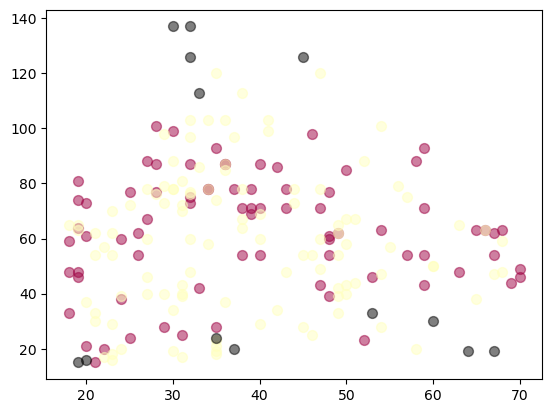

In [102]:
colors = plt.cm.Spectral(np.linspace(0, 1, len(unique_labels)))
for k, col in zip(unique_labels, colors):
    if k == -1:
        # Black used for noise.
        col = 'k'

    class_member_mask = (labels == k)

    # Plot the datapoints that are clustered
    xy = df[class_member_mask & core_sample_mask]
    plt.scatter(xy.Age, xy["Annual Income (k$)"],s=50, c=[col], marker=u'o', alpha=0.5)

    # Plot the outliers
    xy = df[class_member_mask & ~core_sample_mask]
    plt.scatter(xy.Age, xy["Annual Income (k$)"],s=50, c=[col], marker=u'o', alpha=0.5)